In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import itertools

In [2]:
Base = pd.read_csv("Datos/Train.csv", dtype = {'ID' : 'str'})

Nuevos_nombres  = {'Gender' : 'Genero'
                   ,'Ever_Married' : 'Casado'
                   ,'Age' : 'Edad'
                   ,'Graduated' : 'Graduado'
                   ,'Profession' : 'Profesión'
                   ,'Work_Experience' : 'Experiencia_Laboral'
                   ,'Spending_Score' : 'Categoría_Gasto'
                   ,'Family_Size' : 'Tamaño_Familia'
                   ,'Var_1' : 'Var_1'  }

Base.rename(columns=Nuevos_nombres, inplace=True)
Base.drop(columns=['Var_1'], inplace=True)

### Descripción General de la Base

In [3]:
print('\033[1mLa base inicial tiene '+ str(Base.shape[0])+ ' filas y ' + str(Base.shape[1]) + ' columnas\033[0m')
print('\033[1mA continuación se muestran las primeras 5 filas de la base\n\033[0m')
Base.head(5)
#Base.info()

La base inicial tiene 8068 filas y 10 columnas
A continuación se muestran las primeras 5 filas de la base



,ID,Genero,Casado,Edad,Graduado,Profesión,Experiencia_Laboral,Categoría_Gasto,Tamaño_Familia,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [4]:
print('\033[1mA continuación se muestra la cantidad y el porcentaje de datos faltantes que se tienen por columna\033[0m')
cantidad_nulos = pd.DataFrame(Base.isnull().sum())
cantidad_nulos.rename( columns = {0:'Cantidad_Nulos'}, inplace = True )
cantidad_nulos['Porcentaje_Nulos'] = round(cantidad_nulos['Cantidad_Nulos'] / len(Base),2)
cantidad_nulos.sort_values( by = 'Cantidad_Nulos' ,ascending=False, inplace = True)

Variables_con_nulos = cantidad_nulos [cantidad_nulos['Porcentaje_Nulos'] > 0]
Variables_con_nulos

A continuación se muestra la cantidad y el porcentaje de datos faltantes que se tienen por columna


,Cantidad_Nulos,Porcentaje_Nulos
Experiencia_Laboral,829,0.10
Tamaño_Familia,335,0.04
Casado,140,0.02
Profesión,124,0.02
Graduado,78,0.01


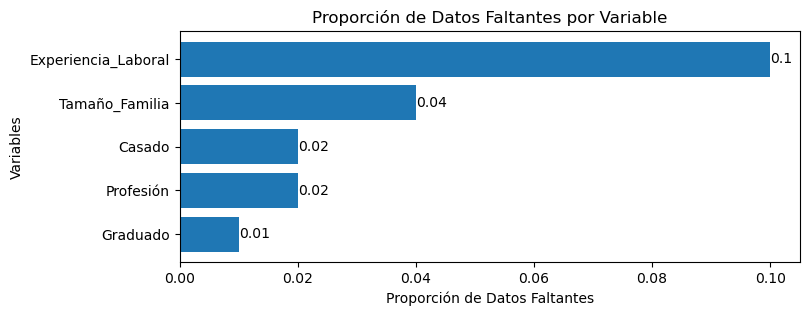

In [5]:
plt.figure(figsize=(8, 3))
Barras = plt.barh(Variables_con_nulos.index, Variables_con_nulos['Porcentaje_Nulos'], color='#1f77b4')
plt.title('Proporción de Datos Faltantes por Variable')
plt.xlabel('Proporción de Datos Faltantes')
plt.ylabel('Variables')
plt.gca().invert_yaxis()  # Invertir el eje Y para que las barras se ordenen de mayor a menor

for Barra in Barras:
    plt.text(Barra.get_width(), Barra.get_y() + Barra.get_height()/2, f'{Barra.get_width():.0}', 
             va='center', ha='left', color='black')

plt.show()

### Analisis descriptivo Variables Numericas

In [6]:
Analisis_Descriptivo = round(Base.describe(),2)
Variables_Numericas = Analisis_Descriptivo.columns
coef_var = (Base[Variables_Numericas].std() / Base[Variables_Numericas].mean())
Analisis_Descriptivo.loc['coef_var'] = coef_var
Analisis_Descriptivo = Analisis_Descriptivo.round(2)
Analisis_Descriptivo

,Edad,Experiencia_Laboral,Tamaño_Familia
count,8068.00,7239.00,7733.00
mean,43.47,2.64,2.85
std,16.71,3.41,1.53
min,18.00,0.00,1.00
25%,30.00,0.00,2.00
50%,40.00,1.00,3.00
75%,53.00,4.00,4.00
max,89.00,14.00,9.00
coef_var,0.38,1.29,0.54


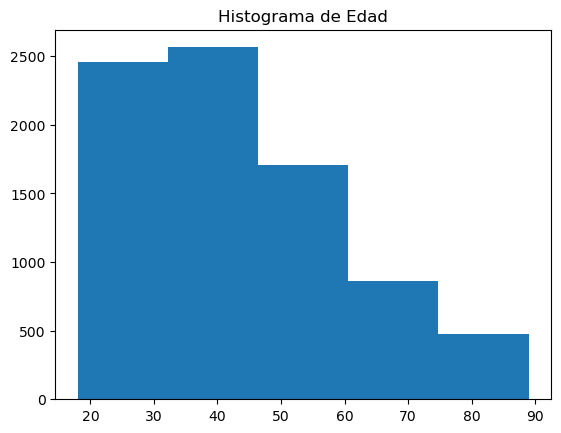

Columna: Edad
Estadístico de Anderson-Darling: 102.26382016279422
Valores críticos: [0.576 0.656 0.787 0.918 1.091]
Niveles de significancia correspondientes: [15.  10.   5.   2.5  1. ]
Los datos de esta variable no siguen una distribución normal (se rechaza H0)



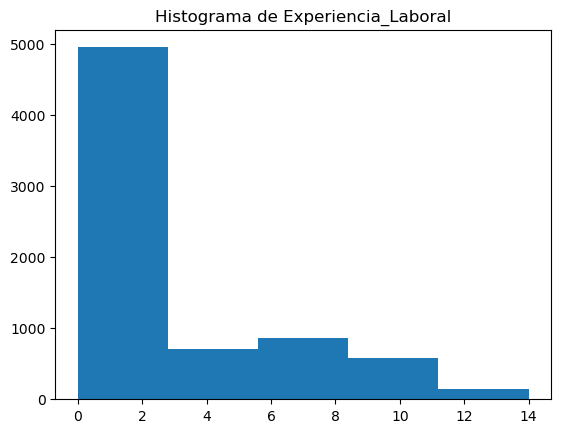

Columna: Experiencia_Laboral
Estadístico de Anderson-Darling: nan
Valores críticos: [0.576 0.656 0.787 0.918 1.091]
Niveles de significancia correspondientes: [15.  10.   5.   2.5  1. ]
Los datos de esta variable siguen una distribución normal (no se rechaza H0)



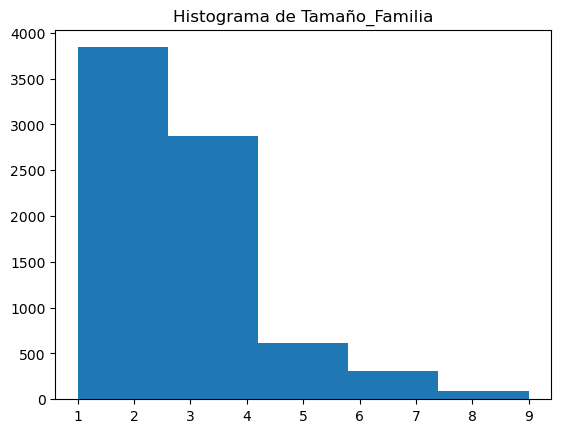

Columna: Tamaño_Familia
Estadístico de Anderson-Darling: nan
Valores críticos: [0.576 0.656 0.787 0.918 1.091]
Niveles de significancia correspondientes: [15.  10.   5.   2.5  1. ]
Los datos de esta variable siguen una distribución normal (no se rechaza H0)



In [7]:
for Columna in Variables_Numericas:
    plt.hist(Base[Columna], bins=5)
    mensaje = ['Histograma de ' + Columna]
    plt.title(" ".join(mensaje))
    plt.show()
    Data_Columna = Base[Columna].values
    Resultado = stats.anderson(Data_Columna)
    print("Columna:", Columna)
    print("Estadístico de Anderson-Darling:", Resultado.statistic)
    print("Valores críticos:", Resultado.critical_values)
    print("Niveles de significancia correspondientes:", Resultado.significance_level)
    print("\033[1mLos datos de esta variable no siguen una distribución normal (se rechaza H0)\n\033[0m") if Resultado.statistic > Resultado.critical_values[2] else print("\033[1mLos datos de esta variable siguen una distribución normal (no se rechaza H0)\n\033[0m")

### Analisis descriptivo valiables categoricas

Male      54.747149
Female    45.252851
Name: Genero, dtype: float64

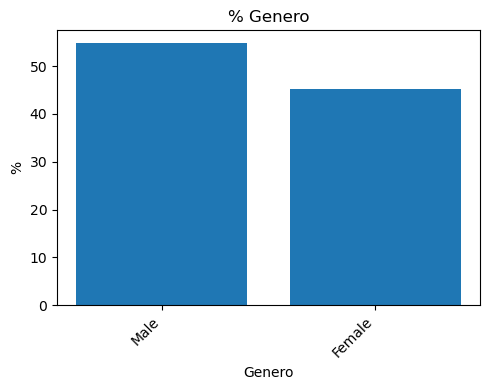

Yes    58.564581
No     41.435419
Name: Casado, dtype: float64

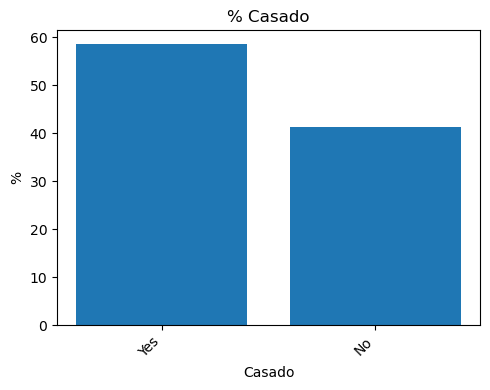

Yes    62.177722
No     37.822278
Name: Graduado, dtype: float64

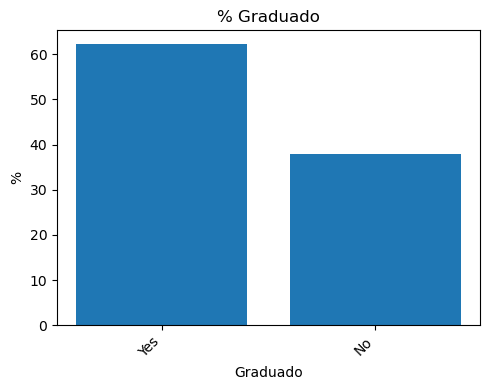

Artist           31.671702
Healthcare       16.767372
Entertainment    11.946123
Engineer          8.799094
Doctor            8.660624
Lawyer            7.842397
Executive         7.540282
Marketing         3.675730
Homemaker         3.096677
Name: Profesión, dtype: float64

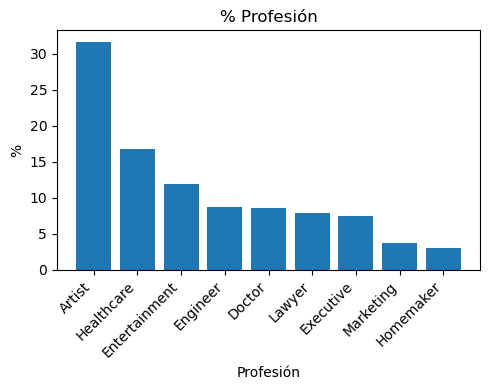

Low        60.461081
Average    24.467030
High       15.071889
Name: Categoría_Gasto, dtype: float64

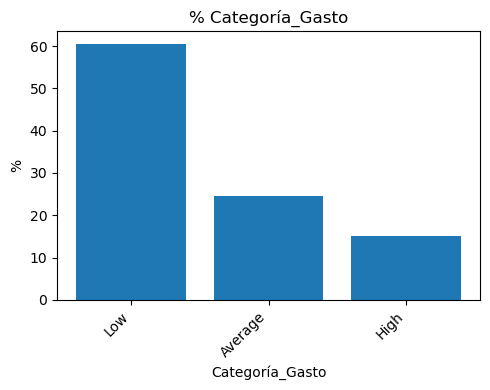

D    28.111056
A    24.442241
C    24.417452
B    23.029251
Name: Segmentation, dtype: float64

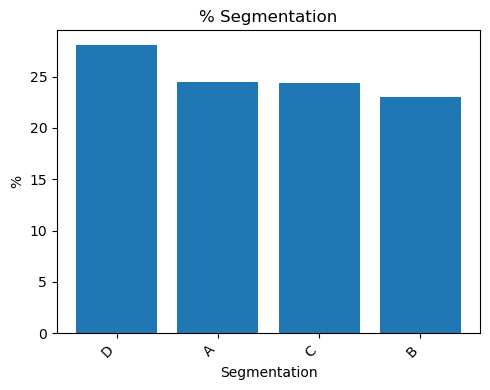

In [8]:
Variables_Categoricas = Base.drop(columns=list(Variables_Numericas) + ['ID']).columns
for Variable in Variables_Categoricas:
    frecuencia = Base[Variable].value_counts(normalize=True) * 100
    display(frecuencia)
    fig = plt.figure(figsize=(5, 4))  # Ajusta el tamaño de la figura según tus necesidades
    plt.bar(frecuencia.index, frecuencia.values)
    plt.xlabel(Variable)
    plt.ylabel('%')
    plt.title('% ' + Variable)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Relacion Entre Variables

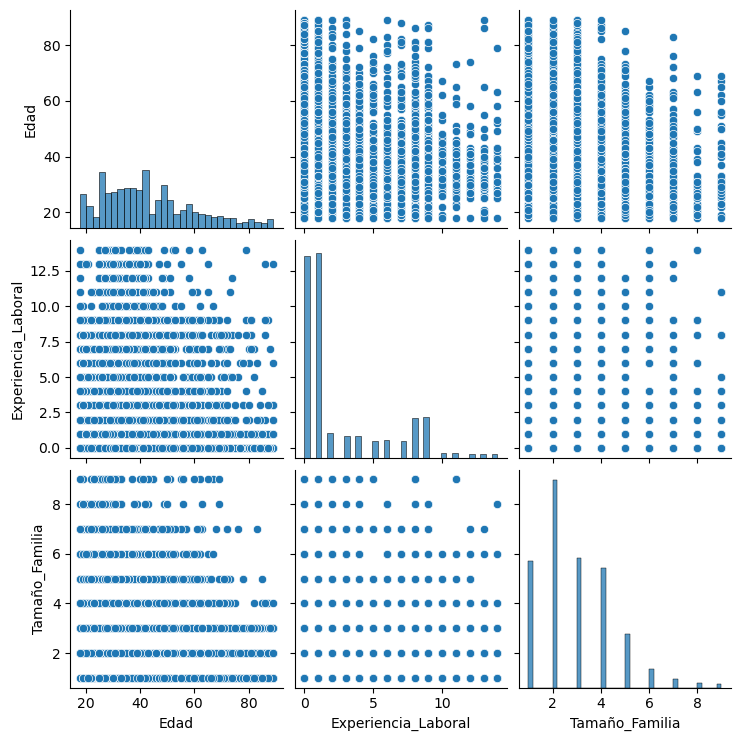

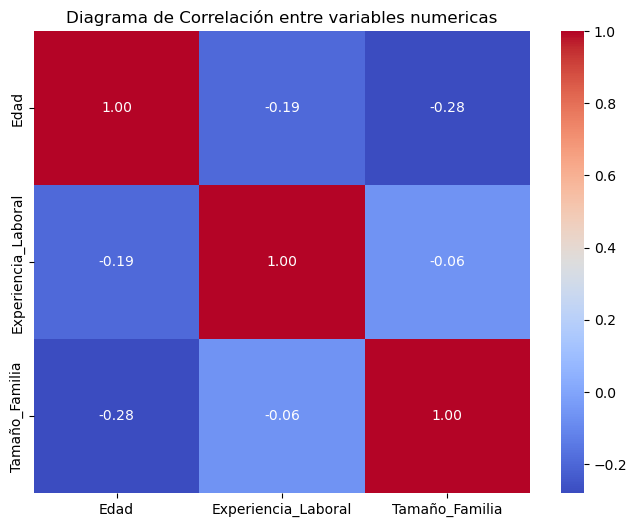

In [9]:
sns.pairplot(Base[Variables_Numericas], kind="scatter")
correlation_matrix = Base[Variables_Numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Diagrama de Correlación entre variables numericas')
plt.show()

### Relacion Entre las Variables Categoricas

In [10]:
for Variable_Principal, Variable in itertools.combinations(Variables_Categoricas, 2):
    print("\033[1m" + Variable_Principal + " - " + Variable +  "\n\033[0m")
    Tabla_contingencia = pd.crosstab(Base[Variable_Principal], Base[Variable])
    chi2, p_valor, grados_libertad, _ = chi2_contingency(Tabla_contingencia)
    
    n = Tabla_contingencia.sum().sum()  
    min_dim = min(Tabla_contingencia.shape) - 1  
    v_cramer = np.sqrt(chi2 / (n * min_dim))
    
    print("Tabla de contingencia:\n", Tabla_contingencia)
    print("\nEstadístico de chi-cuadrado:", chi2)
    print("Valor p:", p_valor)
    print("Grados de libertad:", grados_libertad)
    print("V de Cramer:", v_cramer)
    
    alpha = 0.05
    if p_valor < alpha:
        print(f"\033[1mSe rechaza la hipótesis nula: Hay una relación significativa entre las variables '{Variable_Principal}' y '{Variable}'\n\033[0m")
    else:
        print(f"\033[1mNo se puede rechazar la hipótesis nula: No hay una relación significativa entre las variables '{Variable_Principal}' y '{Variable}'\n\033[0m")

Genero - Casado

Tabla de contingencia:
 Casado    No   Yes
Genero            
Female  1707  1868
Male    1578  2775

Estadístico de chi-cuadrado: 106.45507245244583
Valor p: 5.860621184578301e-25
Grados de libertad: 1
V de Cramer: 0.1158780982735355
Se rechaza la hipótesis nula: Hay una relación significativa entre las variables 'Genero' y 'Casado'

Genero - Graduado

Tabla de contingencia:
 Graduado    No   Yes
Genero              
Female    1303  2316
Male      1719  2652

Estadístico de chi-cuadrado: 9.15513517901195
Valor p: 0.002480210554643687
Grados de libertad: 1
V de Cramer: 0.03385002477988003
Se rechaza la hipótesis nula: Hay una relación significativa entre las variables 'Genero' y 'Graduado'

Genero - Profesión

Tabla de contingencia:
 Profesión  Artist  Doctor  Engineer  Entertainment  Executive  Healthcare  \
Genero                                                                      
Female       1213     304       559            253         32         557   
Male     

### Relacion Entre variables Numericas y Categoricas

In [11]:
for Categorica in Variables_Categoricas:
    for Variable in Variables_Numericas:
        print(f"\033[1m{Variable} ~ {Categorica}\033[0m")
        formula = f'{Variable} ~ C({Categorica})'
        model = ols(formula, data=Base).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)
        print('\n')


Edad ~ Genero
                 sum_sq      df         F    PR(>F)
C(Genero)  2.056948e+03     1.0  7.370977  0.006643
Residual   2.250901e+06  8066.0       NaN       NaN


Experiencia_Laboral ~ Genero
                 sum_sq      df          F        PR(>F)
C(Genero)    301.191233     1.0  26.041045  3.427446e-07
Residual   83703.283142  7237.0        NaN           NaN


Tamaño_Familia ~ Genero
                 sum_sq      df          F        PR(>F)
C(Genero)     56.684544     1.0  24.242834  8.668190e-07
Residual   18076.607840  7731.0        NaN           NaN


Edad ~ Casado
                 sum_sq      df           F  PR(>F)
C(Casado)  7.121301e+05     1.0  3758.00588     0.0
Residual   1.501952e+06  7926.0         NaN     NaN


Experiencia_Laboral ~ Casado
                 sum_sq      df        F        PR(>F)
C(Casado)    780.965778     1.0  68.0094  1.921196e-16
Residual   81760.409117  7120.0      NaN           NaN


Tamaño_Familia ~ Casado
                 sum_sq      df      

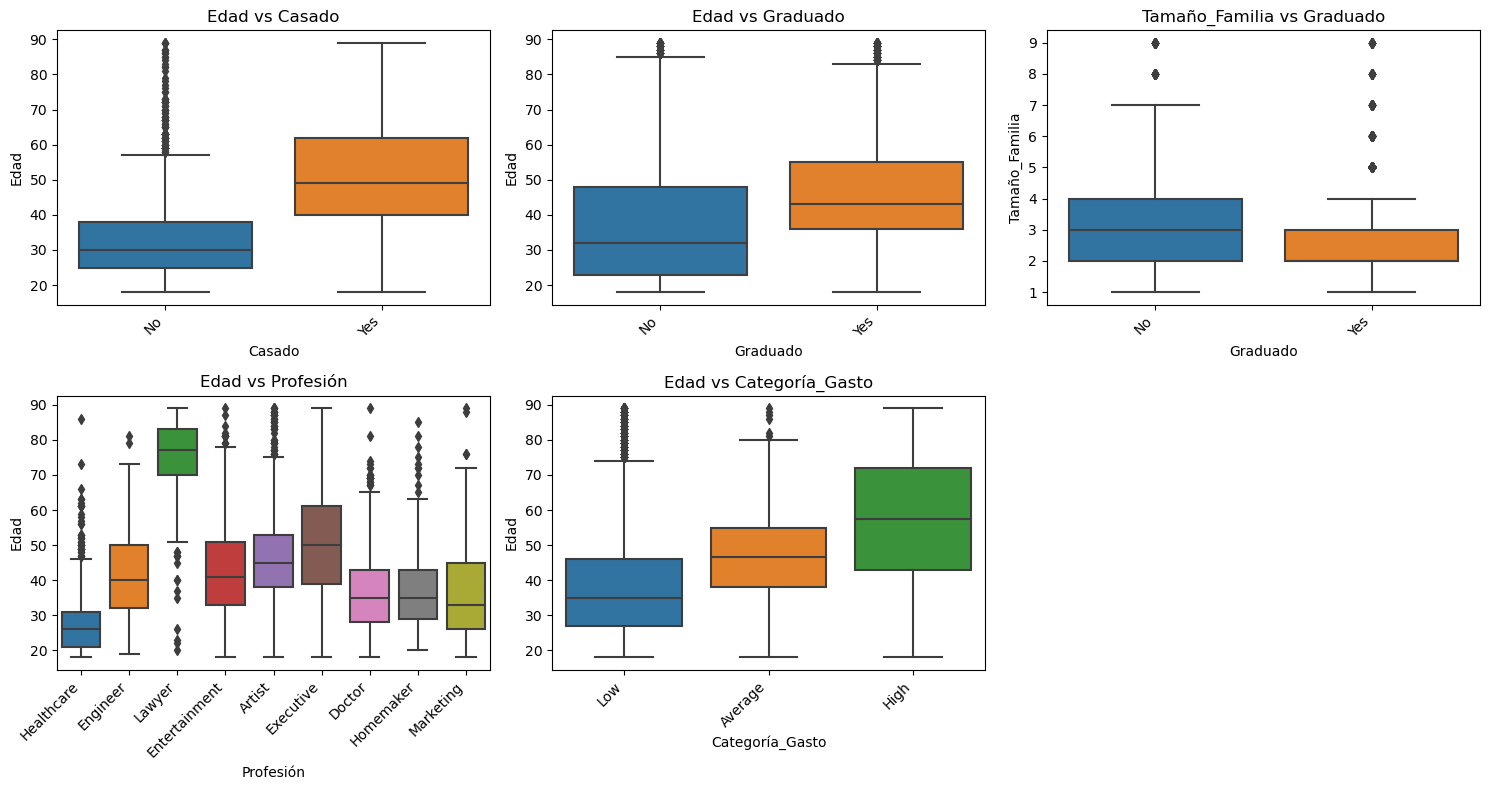

In [12]:
Combinaciones = [
    ('Edad', 'Casado'),
    ('Edad', 'Graduado'),
    ('Tamaño_Familia', 'Graduado'),
    ('Edad', 'Profesión'),
    ('Edad', 'Categoría_Gasto')]

ncols = 3
num_plots = len(Combinaciones)
nrows = (num_plots + 1) // ncols  


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

for ax, (Variable_numerica, Variable_categorica) in zip(axes.flatten(), Combinaciones):
    sns.boxplot(x=Variable_categorica, y=Variable_numerica, data=Base, ax=ax)
    ax.set_title(f'{Variable_numerica} vs {Variable_categorica}')
    ax.set_xlabel(Variable_categorica)
    ax.set_ylabel(Variable_numerica)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.suptitle('')  
plt.show()